# turn #1
## BFS on first floor

get floor plan from SCSS, and run BFS

In [1]:
from PIL import Image
from IPython.display import Image as IPImage
from queue import Queue
from itertools import permutations
from collections import namedtuple

Point = namedtuple('Point', 'x, y')

My desk is at co-ordinates `(90,450)`.

In [2]:
desk = Point(90, 450)

This will enable us to mark a location with an 'X'

In [3]:
# mark location with a 'X' on image
def mark_location(pixels, x, y, res=10):
    for k in range(res):
        for i, j in [(1, -1), (1, 1), (-1, -1), (-1, 1)]:
                pixels[x + (i * k), y + (j * k)] = (255, 0 ,0)

The stairs are at locations: `(270, 540), (266, 71), (766, 54), (890, 390)`

In [4]:
stairs = [Point(x, y) for x, y in ((270, 540), (266, 71), (766, 54), (890, 385))]

The BFS algorithm simply tries to navigate from each point to the desk

In [5]:
WHITE = (255, 255, 255)
colors = list(permutations((250, 225, 200), 3))
colors.append(WHITE)

def BFS(start, end, floorplan, color):
    # we start the queue with the start point
    # the queue holds the path
    # each path is a list of points
    queue = Queue()
    queue.put([start])
    valid_colors = [c for c in colors if c != color]
    
    # then we continue to iterate until the queue is not empty
    while not queue.empty():
        # get the path from queue
        path = queue.get()
        # get last point in path
        pixel = path[-1]
        # check if it's the end point
        if pixel == end:
            return path
        x, y = pixel
        # check for valid neighbours
        # add their paths to the queue
        neighbours = ((x + 1, y), (x, y + 1), (x - 1, y), (x, y - 1))
        for neighbour in neighbours:
            # the pixel is valid if it is WHITE
            x, y = neighbour
            if floorplan[x, y] in valid_colors:
                # set the visited path color
                floorplan[x, y] = color
                # create a new path
                # add the new point to the path
                # add the path to the queue
                newpath = path[:]
                newpath.append((x, y))
                queue.put(newpath)
    # if the code reaches this point, then there is not valid path
    return None

We'll store the path values associated with each stair in an array called paths

In [6]:
# load the image
stairsimage = Image.open('./first_floor.png')
stairsimage_pixels = stairsimage.load()

paths = []
for index, stair in enumerate(stairs):
    color = colors[index]
    mark_location(stairsimage_pixels, *stair)
    path = BFS(stair, desk, stairsimage_pixels, color)
    if path:
        paths.append(path)
mark_location(stairsimage_pixels, *desk)

for path in paths:
    for x, y in path:
        stairsimage_pixels[x, y] = (255, 0 ,0)

path_lengths = list(map(len, paths))
shortest_path_index = path_lengths.index(min(path_lengths))
shortest_path = paths[shortest_path_index]
for x, y in shortest_path:
    stairsimage_pixels[x, y] = (255, 0 ,0)
    stairsimage_pixels[x + 1, y + 1] = (255, 0 ,0)
    stairsimage_pixels[x - 1, y - 1] = (255, 0 ,0)

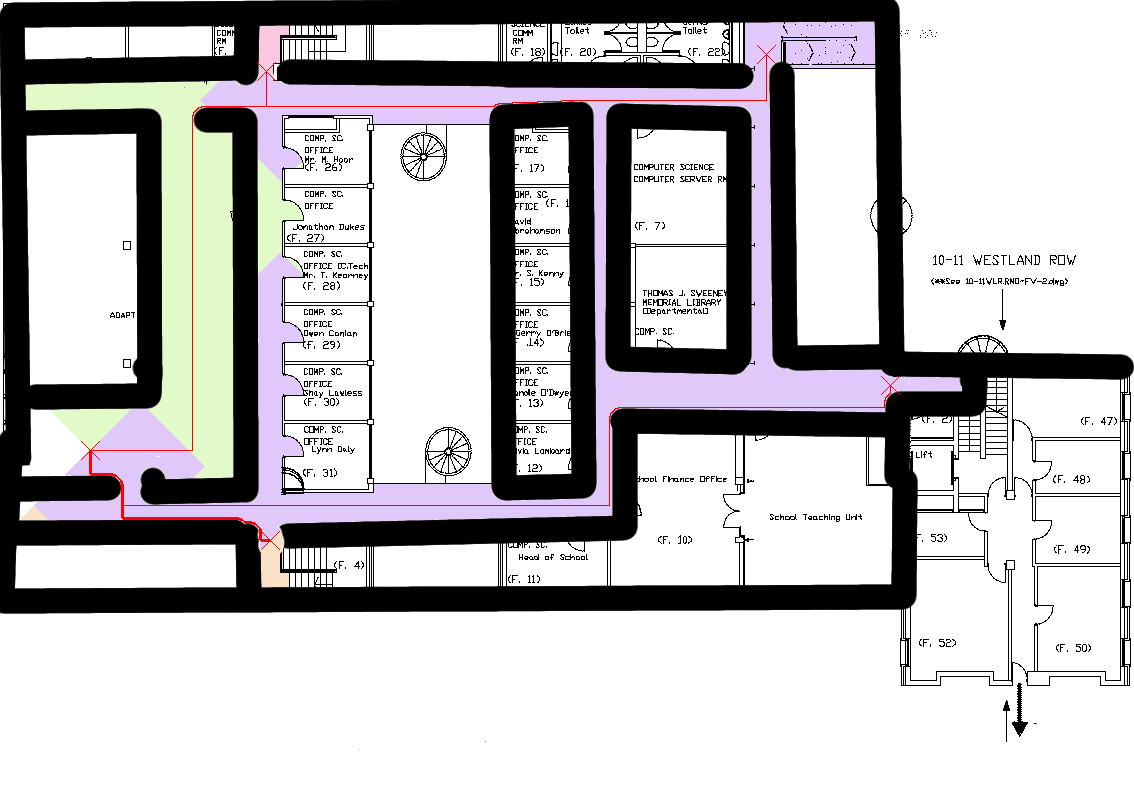

In [7]:
stairsimage.save('./paths.png')
IPImage('./paths.png')